In [131]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math

#function $f(x) = x^2\log(2+x)$
def fun(x):
    return x**2 * np.log(2+x)

#zeros of Tchebychev polynomial T_4
t_zeros = [np.sqrt((2+np.sqrt(2))/4), np.sqrt((2-np.sqrt(2))/4), -np.sqrt((2+np.sqrt(2))/4), -np.sqrt((2-np.sqrt(2))/4)]

In [132]:
def innerproduct(fun1, fun2):
    """innerproduct with rho = 1"""
    result,_ = integrate.quad(lambda x:fun1(x)*fun2(x), -1, 1)
    return result
def square_approx(x):
    """orthogonal projection for square approx."""
    value = innerproduct(lambda x:1, fun)/innerproduct(lambda x:1, lambda x:1) * 1\
            + innerproduct(lambda x:x, fun)/innerproduct(lambda x:x, lambda x:x) * x \
            + innerproduct(lambda x:(1.5*x**2-0.5), fun)/innerproduct(lambda x:(1.5*x**2-0.5), lambda x:(1.5*x**2-0.5)) * (1.5*x**2-0.5)\
            + innerproduct(lambda x:(2.5*x**3-1.5*x), fun)/innerproduct(lambda x:(2.5*x**3-1.5*x),lambda x:(2.5*x**3-1.5*x)) * (2.5*x**3-1.5*x)
    return value
def T_polynomial(x,n):
    """Tchebychev polynomials"""
    x_reg = x
    if x > 1:
        x_reg = 1
    if x < -1:
        x_reg = -1
    return np.cos(n*np.arccos(x_reg))
def weight(x):
    return 1/np.sqrt(1-x**2)
def weight_innerproduct(fun1, fun2):
    """weighted innerproduct with rho = 1/sqrt(1-x^2)"""
    result,_ = integrate.quad(lambda x:fun1(x)*fun2(x)*weight(x), -1, 1)
    return (2/math.pi)*result
def truncate_fourier(x):
    """truncated Tchebychev Fourier series for approximated best uniform approx."""
    clist = [weight_innerproduct(lambda x: T_polynomial(x,k), fun) for k in range(4)]
    return clist[0]/2 + clist[1]*T_polynomial(x,1) + clist[2]*T_polynomial(x,2) + clist[3]*T_polynomial(x,3)
def lk(x, nodes, n, k):
    """lagrange intercep. basis function l_k = \prod_{i=0,i\ne k}^n (x-x_i)/(x_k-x_i)"""
    nodes = t_zeros
    prod = np.prod([(x-nodes[i])/(nodes[k]-nodes[i]) for i in range(len(nodes)) if i != k])
    return prod
def Ln(x, n=3):
    """p_n(x) = \sum_{k=0}^n y_k l_k(x)"""
    nodes = t_zeros
    lk_basis = np.array([lk(x, nodes, n, k) for k in range(len(nodes))])
    yk_list = np.array([fun(nodes[k]) for k in range(len(nodes))])
    p_n_x = lk_basis @ yk_list
    return p_n_x

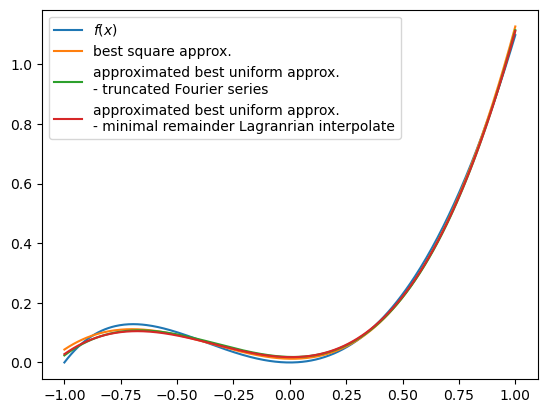

In [134]:
x = np.arange(-1,1+0.005,0.005)
yf = np.array([fun(xi) for xi in x])
ys = np.array([square_approx(xi) for xi in x])
yt = np.array([truncate_fourier(xi) for xi in x])
yl = np.array([Ln(xi) for xi in x])
plt.plot(x,yf,label = "$f(x)$")
plt.plot(x,ys,label = "best square approx.")
plt.plot(x,yt,label = "approximated best uniform approx.\n- truncated Fourier series")
plt.plot(x,yl,label = "approximated best uniform approx.\n- minimal remainder Lagranrian interpolate")
plt.legend(loc = "upper left")
plt.show()

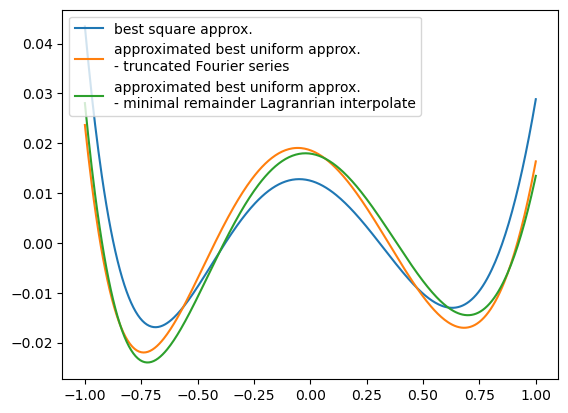

In [135]:
x = np.arange(-1,1+0.005,0.005)
eys = np.array([square_approx(xi)-fun(xi) for xi in x])
eyt = np.array([truncate_fourier(xi)-fun(xi) for xi in x])
eyl = np.array([Ln(xi)-fun(xi) for xi in x])
plt.plot(x,eys,label = "best square approx.")
plt.plot(x,eyt,label = "approximated best uniform approx.\n- truncated Fourier series")
plt.plot(x,eyl,label = "approximated best uniform approx.\n- minimal remainder Lagranrian interpolate")
plt.legend(loc = "upper left")
plt.show()